In [1]:
#Dependencies
import tweepy
import numpy as np
import pandas as pd
from textblob import TextBlob
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

In [2]:
#Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
#API Keys for Twitter
#from config import (consumer_key, consumer_secret, access_token, access_token_secret)

consumer_key = "k7MqHZjMgGc5fgVz1HTexBhja"
consumer_secret = "I0S14nGqR3cEKLNCWjrpszoY4ZlKpimf7AmTwdVqi6MwzmqJy6"

access_token = "979486734927974400-EDJGJLSTvZc834OeeS1IrtDGg2fa94u"
access_token_secret = "aGdy9Qs7gwVciypNFyYBArlghgagd86ATBMAgLi0vdmyp"

In [4]:
#Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [5]:
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [12]:
#News Accounts
news_accounts = ("@BBCNews", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")

#Create the Counter and variable to hold the gathered sentiments
counter = 1
senti = []

#Variable for max_id
#oldest_tweet = None

#Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    #Get all tweets from feed
    #public_tweets = api.user_timeline(news_accounts, max_id = oldest_tweet)
    public_tweets = api.user_timeline(news_accounts)

    #Loop through all tweets 
    for tweet in public_tweets:

        #Print Tweets
        #print("Tweet %s: %s" % (counter, tweet["text"]))
        #print(tweet.text)
        
        #Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        #Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet['id'] - 1
        
        #Add sentiments for each tweet into a list
        senti.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neg,
                           "Neutral": neu,
                           "Tweets Ago": counter})
        #Add to counter 
        counter += 1

In [23]:
#Convert sentiments to DataFrame
senti_pd = pd.DataFrame.from_dict(senti)
senti_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,0.0,Thu Mar 29 23:22:08 +0000 2018,0.0,1.0,0.0,1
1,0.0,Thu Mar 29 23:22:08 +0000 2018,0.0,1.0,0.0,2
2,0.0,Thu Mar 29 23:22:08 +0000 2018,0.0,1.0,0.0,3
3,0.0,Thu Mar 29 23:22:08 +0000 2018,0.0,1.0,0.0,4
4,0.0,Thu Mar 29 23:22:08 +0000 2018,0.0,1.0,0.0,5


In [24]:
#senti_pd.tail()

In [25]:
senti_pd['Compound'].mean()

0.0

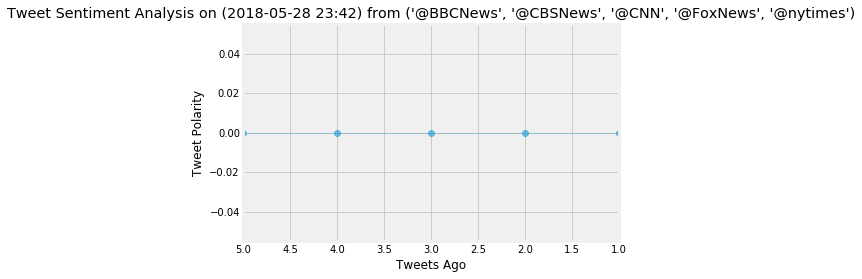

In [30]:
#Create plot
x_vals = senti_pd["Tweets Ago"]
y_vals = senti_pd["Compound"]
plt.plot(x_vals,
         y_vals, marker="o", 
         linewidth=0.5,
         alpha=0.5)

#Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Tweet Sentiment Analysis on ({now}) from {news_accounts}")
plt.xlim([x_vals.max(),x_vals.min()])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

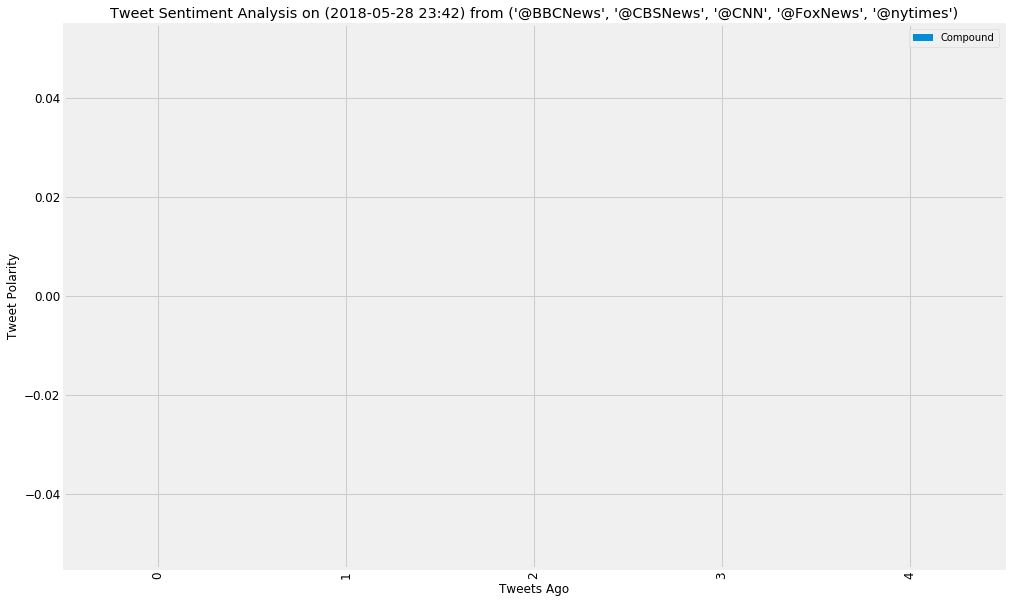

In [31]:
#Bar Plot
ax = senti_pd[['Compound']].plot(kind='bar', title = (f"Tweet Sentiment Analysis on ({now}) from {news_accounts}"), figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Tweets Ago", fontsize=12)
ax.set_ylabel("Tweet Polarity", fontsize=12)
plt.show()